# Import library and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [51]:
df= pd.read_csv("bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Loading dataset

In [52]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#The minimum value of the variable Item_Visibility is 0. Such data has no practical meaning, because when a product is sold in a store, its display area cannot be 0, and it can be treated as a missing value; The value range of the variable Outlet_Establishment_Year is 1985-2009, which represents the year the store was established. This variable can be converted to the length of time the store was established. For categorical variables, you can look at the value of the variable:

In [53]:
#datatype of attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


The variable Item_Outlet_Sales is the target variable, and its missing value is the value in the test set, so don’t consider it. During data cleaning, the missing values ​​of the variables Item_Weight and Outlet_Size will be filled.

Lets look at some basic statistics for numerical variables.

In [125]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Item_Type_15,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,7.297863,15.168133,4.722281,0.459697,0.187610,0.352693,...,0.017365,0.109351,0.327702,0.562947,0.280183,0.326763,0.393054,0.093746,0.718644,0.187610
std,4.226124,0.048742,62.275067,8.371760,1.015211,8.371760,2.837201,0.498402,0.390423,0.477836,...,0.130634,0.312098,0.469403,0.496051,0.449115,0.469057,0.488457,0.291493,0.449687,0.390423
min,4.555000,0.003575,31.290000,1985.000000,3.534854,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.310000,0.033085,93.826500,1987.000000,6.727728,9.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.062517,143.012800,1999.000000,7.492945,14.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,16.000000,0.094585,185.643700,2004.000000,8.039898,26.000000,7.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,9.479448,28.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Some observations:

Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
The lower ‘count’ of Item_Weight and Item_Outlet_Sales confirms the findings from the missing value check.

Moving to nominal (categorical) variable, lets have a look at the number of unique values in each of them.

In [54]:
#check unique value in dataset
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

This tells us that there are 1559 products and 10 outlets/stores (which was also mentioned in problem statement). Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable. I’ll exclude the ID and source variables for obvious reasons.

# Preprocessing the dataset

In [55]:
# check for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Note that the Item_Outlet_Sales is the target variable and missing values are ones in the test set. So we need not worry about it. But we’ll impute the missing values in Item_Weight and Outlet_Size in the data cleaning section.

In [56]:
#check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] =='object':
        cat_col.append(x)
cat_col        

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [57]:
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [58]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

The output gives us following observations:

Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.
Item_Type: Not all categories have substantial numbers. It looks like combining them can give better results.
Outlet_Type: Supermarket Type2 and Type3 can be combined. But we should check if that’s a good idea before doing it.

Observe the variable Item_Identifier and find that its value starts with FD, DR, NC, namely Food, Drinks and Non-Consumables. You can use this variable to create a new variable Item_Type_Combined:

In [59]:
#fill the missing values
item_weight_mean = df.pivot_table(values ="Item_Weight",index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


As per crossponding item identifier we get item weight 

In [60]:
#now we need to get the missing value and store in new variables
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

# Imputing Missing Values

We found two variables with missing values – Item_Weight and Outlet_Size. Lets impute the former by the average weight of the particular item. This can be done as:

Lets Fill the missing value

In [61]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean: 
            df['Item_Weight'][i] = item_weight.loc[Item_Weight]
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [62]:
df['Item_Weight'].isnull().sum()

0

In [63]:
outlet_size_mode = df.pivot_table(values='Outlet_Size' , columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [64]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [65]:
df['Outlet_Size'].isnull().sum()

0

In [66]:
sum(df['Item_Visibility']==0)

526

In [67]:
#replace zero with mean
df.loc[:, 'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()],inplace=True)

In [68]:
sum(df['Item_Visibility']==0)

0

In [69]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

All the attributes into two category that Lat fat and Regular
done all the pre processing in data set

# Creation of new attributes

In [70]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])

In [71]:
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [72]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [73]:
df.loc[df['New_Item_Type']=='Non-Consumable','Item_Fat_Content']= 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [74]:
#create small values for establisment year
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [75]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


# Exploratory Data Analysis

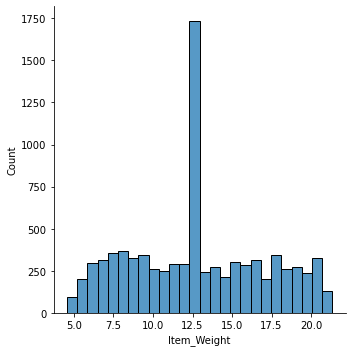

In [77]:
sns.displot(df['Item_Weight'])

We can see item weight mean is higher because we have filled some of the missing value with the mean and most of the item have value zero that means particular item dont have paticular data.

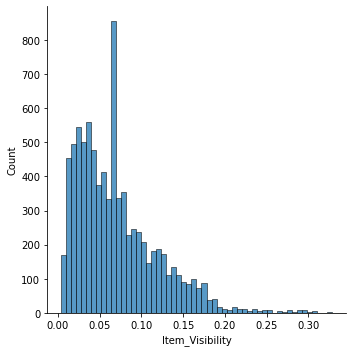

In [78]:
sns.displot(df['Item_Visibility'])

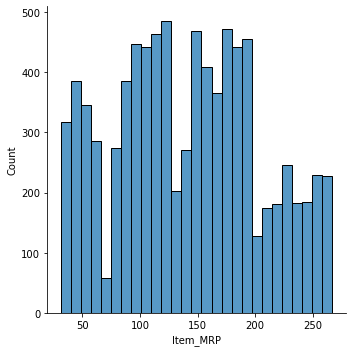

In [79]:
sns.displot(df['Item_MRP'])

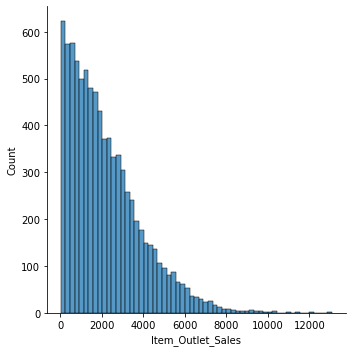

In [80]:
sns.displot(df['Item_Outlet_Sales'])

Value is show high in this and the data set is also less quied. We need to normalized it now.

In [81]:
# Log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

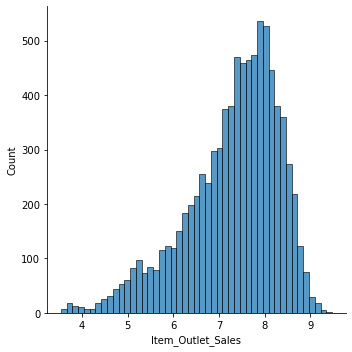

In [82]:
sns.displot(df['Item_Outlet_Sales'])

now you can see values are now minimal so the model can predict with less error. Its in normal distribution

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

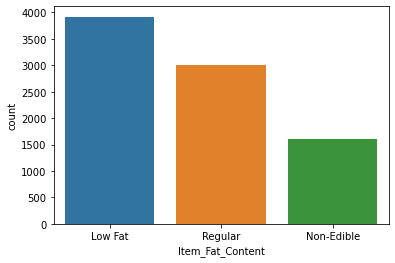

In [83]:
sns.countplot(df["Item_Fat_Content"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

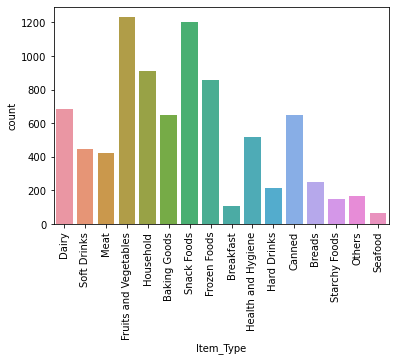

In [84]:
sns.countplot(df["Item_Type"])
plt.xticks(rotation=90)

#forItem_Type we have 16 different types of unique values and it is high number for categorical variable. Therefore we must try to reduce it.

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

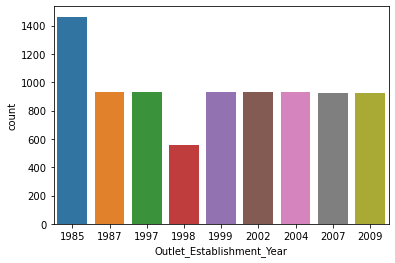

In [85]:
sns.countplot(df["Outlet_Establishment_Year"])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

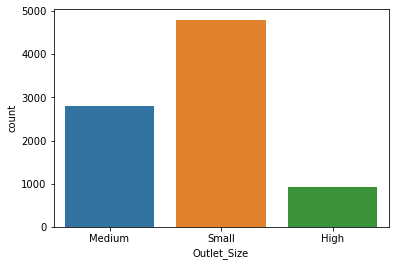

In [86]:
sns.countplot(df["Outlet_Size"])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

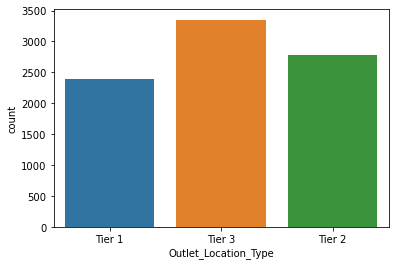

In [87]:
sns.countplot(df["Outlet_Location_Type"])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

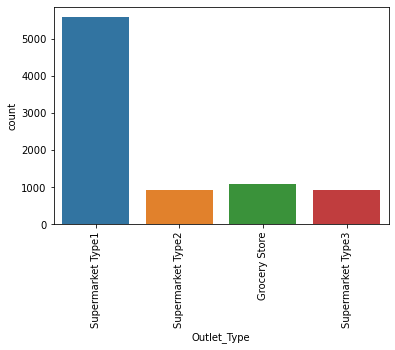

In [98]:
sns.countplot(df["Outlet_Type"])
plt.xticks(rotation=90)

# Coorelation Matrix

<AxesSubplot:>

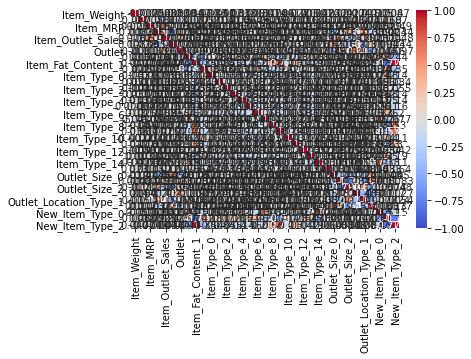

In [121]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [115]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Outlet,...,Item_Type_15,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,Supermarket Type1,8.225808,14,9,...,0,0,1,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,Supermarket Type2,6.096776,4,3,...,0,0,1,0,0,0,1,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,Supermarket Type1,7.648868,14,9,...,0,0,1,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,182.0950,OUT010,1998,Grocery Store,6.597664,15,0,...,0,0,0,1,0,0,1,0,1,0
4,NCD19,8.93,0.066132,53.8614,OUT013,1987,Supermarket Type1,6.903451,26,1,...,0,1,0,0,0,0,1,0,0,1


# Input split

In [110]:
x = df.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y= df['Item_Outlet_Sales']

# Model Training

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, x,y) :
    #train the model
    model.fit(x,y)
    
    #predict the training set
    pred=model.predict(x)
    
    #perform cross-validation
    cv_score = cross_val_score(model,x,y, scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score", cv_score)

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, x,y)
coef.plot(kind='bar',title="Model Cofficiients")

We can see this is better than baseline model. But if you notice the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

Ridge Regression Model:

In [ ]:
model = Ridge(normalize=True)
train(model, x,y)
coef.plot(kind='bar',title="Model Cofficiients")

#Though the regression coefficient look better now, the score is about the same. You can tune the parameters of the model for slightly better results but I don’t think there will be a significant improvement. Even the cross-validation score is same so we can’t expect way better performance.

In [ ]:
model = Lasso()
train(model, x,y)
coef.plot(kind='bar',title="Model Cofficiients")

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x,y)
coef=pd.series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Feature Importance")

 Here you can see that the RMSE is 1058 and the mean CV error is 1091. This tells us that the model is slightly overfitting. Lets try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x,y)
coef=pd.series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Feature Importance")

You might feel this is a very small improvement but as our model gets better, achieving even minute improvements becomes exponentially difficult. Lets try another random forest with max_depth of 6 and 400 trees. Increasing the number of trees makes the model robust but is computationally expensive.

In [ ]:
from sklearn.ensemble import ExtraTreeRegressor
model = ExtraTreeRegressor()
train(model, x,y)
coef=pd.series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title="Feature Importance")

Again this is an incremental change but will help you get a jump of 5-10 ranks on leaderboard. You should try to tune the parameters further to get higher accuracy. But this is good enough to get you into the top 20 on the LB as of now

# Conclusion

This article took us through the entire journey of solving a data science problem. We started with making some hypothesis about the data without looking at it. Then we moved on to data exploration where we found out some nuances in the data which required remediation. Next, we performed data cleaning and feature engineering, where we imputed missing values and solved other irregularities, made new features and also made the data model-friendly by one-hot-coding. Finally we made regression, decision tree and random forest model and got a glimpse of how to tune them for better results.

I believe everyone reading this article should attain a good score in BigMart Sales now. For beginners, you should achieve at least a score of 1150 and for the ones already on the top, you can use some feature engineering tips from here to go further up. All the best to all!